In [1]:
import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
# Yang Boleh Hanya Pregnancies
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
Age_mean = df.Age[df.Age!= 0].mean()
DiabetesPF_mean = df.DiabetesPedigreeFunction[df.DiabetesPedigreeFunction!= 0].mean()
BMI_mean = df.BMI[df.BMI!= 0].mean()
Insulin_mean = df.Insulin[df.Insulin!= 0].mean()
SkinThickness_mean = df.SkinThickness[df.SkinThickness!= 0].mean()
BloodPressure_mean = df.BloodPressure[df.BloodPressure!= 0].mean()
Glucose_mean = df.Glucose[df.Glucose!= 0].mean()
# nonzero_mean
# age_mean

In [5]:
df['Age'] = df['Age'].replace(0, Age_mean)
df['DiabetesPedigreeFunction'] = df ['DiabetesPedigreeFunction'].replace(0, DiabetesPF_mean)
df['BMI'] = df['BMI'].replace(0,BMI_mean)
df['Insulin'] = df['Insulin'].replace(0,Insulin_mean)
df['SkinThickness'] = df['SkinThickness'].replace(0,SkinThickness_mean)
df['BloodPressure'] = df['BloodPressure'].replace(0, BloodPressure_mean)
df['Glucose'] = df['Glucose'].replace(0, Glucose_mean)

In [6]:
df.head()
atribut = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
label = ['Outcome']

In [7]:
X = df[atribut]
y = df[label]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# Create Decision Tree classifer object
clf = RandomForestClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

C:\Users\BTPNSSHIFTED\AppData\Local\Temp\ipykernel_23164\2106239856.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train,y_train)


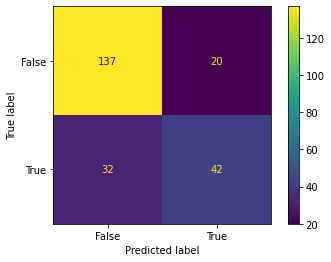

In [18]:
actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(f"Accuracy: {(metrics.accuracy_score(y_test, y_pred) * 100)}%")

Accuracy: 0.7748917748917749
Accuracy: 77.48917748917748%
